In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("C:\\Users\\rcmlp.12\\Desktop\\Data Analytics\\credit card\\creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
columns=data.columns.tolist()


In [8]:
columns=[c for c in columns if c not in ["Class"]]

In [10]:
target="Class"
# (store the variable we are predicting)

In [11]:
# Define the random state

In [12]:
state=np.random.RandomState(42)

In [13]:
X=data[columns]
y=data[target]

In [14]:
X_outliers=state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))

In [16]:
# print the shapes of X and Y
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


# EXPLORATORY DATA ANALYSIS

In [18]:
data.isnull().values.any()

False

In [21]:
count_classes=pd.value_counts(data["Class"],sort=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Transaction Class Distribution')

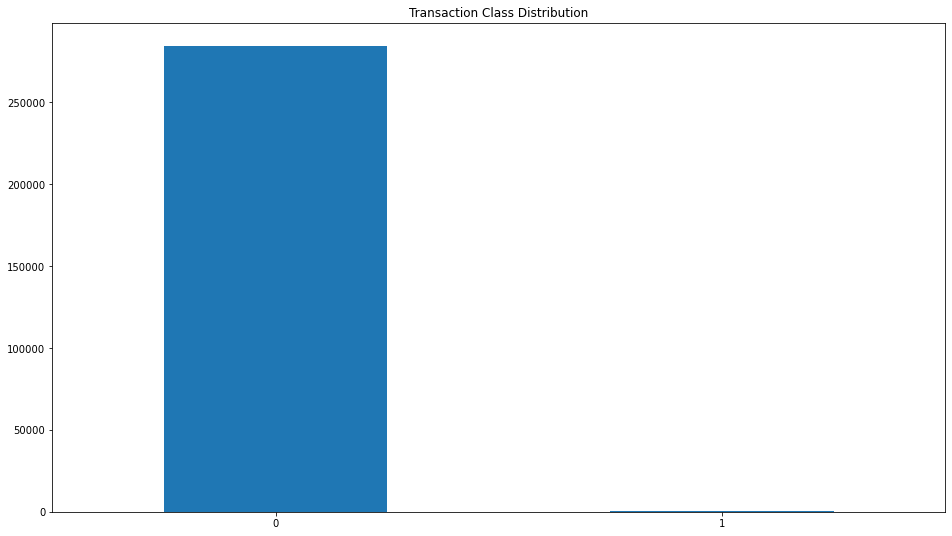

In [27]:
plt.figure(figsize=(16,9))
count_classes.plot(kind="bar",rot=0)
plt.title("Transaction Class Distribution")

In [28]:
fraud=data[data["Class"]==1]
normal=data[data["Class"]==0]

In [29]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [33]:
!pip install imblearn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [37]:
from imblearn.under_sampling import NearMiss

In [43]:
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)

In [44]:
X_res.shape, y_res.shape 

((984, 30), (984,))

In [47]:
from collections import Counter
print("Original dataset.shape()".format(Counter(y)))
print("Resampled dataset.shape().format(Counter(y_res))")

Original dataset.shape()
Resampled dataset.shape().format(Counter(y_res))


Original dataset.shape()
Resampled dataset.shape().format(Counter(y_res))
